# Linear Model That Separate Two Clusters

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [12]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class
)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

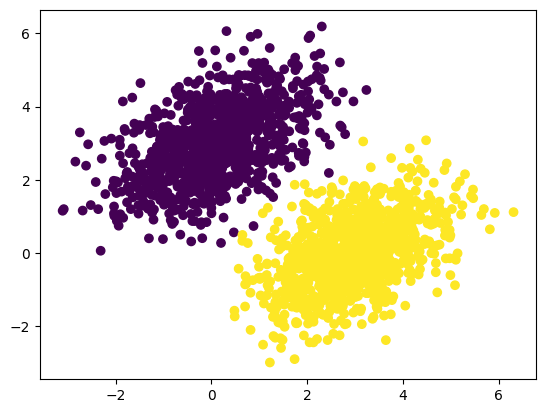

In [13]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [14]:
input_dim = 2
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [15]:
def model(inputs):
    return tf.matmul(inputs, W) + b

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [16]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [17]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.6622
Loss at step 1: 0.2843
Loss at step 2: 0.1316
Loss at step 3: 0.1040
Loss at step 4: 0.0948
Loss at step 5: 0.0886
Loss at step 6: 0.0833
Loss at step 7: 0.0785
Loss at step 8: 0.0741
Loss at step 9: 0.0701
Loss at step 10: 0.0664
Loss at step 11: 0.0630
Loss at step 12: 0.0599
Loss at step 13: 0.0571
Loss at step 14: 0.0545
Loss at step 15: 0.0521
Loss at step 16: 0.0500
Loss at step 17: 0.0480
Loss at step 18: 0.0461
Loss at step 19: 0.0445
Loss at step 20: 0.0429
Loss at step 21: 0.0415
Loss at step 22: 0.0403
Loss at step 23: 0.0391
Loss at step 24: 0.0380
Loss at step 25: 0.0370
Loss at step 26: 0.0361
Loss at step 27: 0.0353
Loss at step 28: 0.0345
Loss at step 29: 0.0338
Loss at step 30: 0.0332
Loss at step 31: 0.0326
Loss at step 32: 0.0321
Loss at step 33: 0.0316
Loss at step 34: 0.0312
Loss at step 35: 0.0307
Loss at step 36: 0.0304
Loss at step 37: 0.0300
Loss at step 38: 0.0297
Loss at step 39: 0.0294


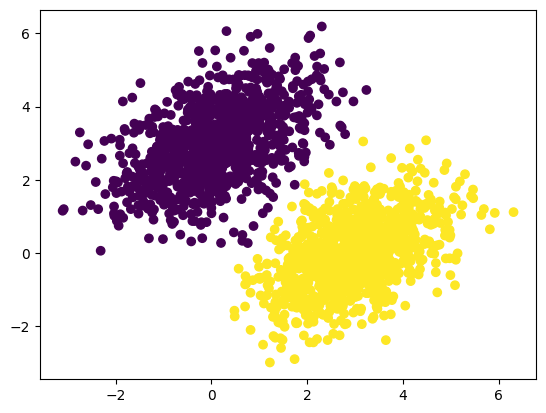

In [18]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

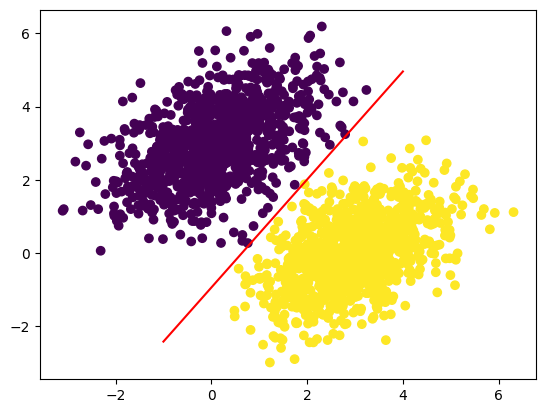

In [19]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)